# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Classification with MLP



**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors**: Mark Glickman and Pavlos Protopapas 


<hr style="height:2pt">

In [309]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [310]:
import warnings
warnings.filterwarnings('ignore')

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit.

**Names of person you have worked with goes here: Jingyi Chen**
<br><BR>

###  Use only the libraries below:

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from itertools import chain

from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback, ModelCheckpoint, History 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix

%matplotlib inline

<div class="theme"> Overview </div> 

### Galaxy Zoo
For this homework you will work with real astronomical data with the purpose of classifying galaxies based on visual attributes as they appear in astronomical surveys of the night sky, such as color and morphology. Galaxy morphology is strongly correlated with many physical parameters of those astronomical bodies, including their mass, density distribution, temperature, and star formation history. In turn, these parameters can be estimated using observations of the attributes mentioned above. 

The Galaxy Zoo project includes collected morphological attributes of nearly 900,000 galaxies drawn from the [Sloan Digital Sky Survey](http://skyserver.sdss.org/dr15/en/home.aspx). The annotation was provided by hundreds of thousands of volunteers, or 'citizen scientists' as we call them, who voted on the galaxy type based only on its image (for more details on galaxy morphology and classification see <a href="https://academic.oup.com/mnras/article/410/1/166/1032478">Chris Lintott et al.</a>). 

Your task is to train a binary classifier on the Galaxy Zoo data in order to distinguish an elliptical galaxy from spirals, mergers and unknown, which we will call non-elliptical galaxies, based on its visual morphology.  

We provide a subset of data in `galaxy_morphology_labeled.csv` so there is no need for you to download it. The full dataset is available at http://data.galaxyzoo.org.


<span class='sub-q'> Dataset Attributes:</span>
- **green_color**: the amount of light measured in the green frequency band (wavelength range 464 $\pm$ 128~nm)
- **red_color**: the amount of light measured in the red frequency band (wavelength range 658 $\pm$ 138~nm)
- **infrared_color**: the amount of light measured in the infrared frequency band (wavelength range 806 $\pm$ 149~nm)
- **de_vaucouleurs_fit_axial_ratio**: axial ratio associated with the [de Vaucouleurs fit](https://en.wikipedia.org/wiki/De_Vaucouleurs%27_law) to the two-dimensional image of the galaxy
- **exponential_fit_axial_ratio**: the axial ratio associated with an exponential fit to the two-D image of the galaxy 
- **exponential_disc_fit_log_likelihood**: log likelihood associated with an exponential fit to the two-D image of the galaxy
- **de_vaucouleurs_fit_log_likelihood**: log likelihood associated with a de Vaucouleurs fit to the two-D image of the galaxy
- **star_log_likelihood**: the log likelihood that the object is a point-like source (star) object rather than a galaxy
- **number_of_votes**: total number of volunteer votes
- **probability_elliptical**: fraction of votes for elliptical morphology
- **probability_spiral**: fraction of votes for spiral morphology
- **probability_unknown**: fraction of votes for unknown morphology
- **probability_merger**: fraction of votes for merger morphology
- **class**: morphology with the highest fraction of votes

Notice that the volunteers did not have access to any of the attributes but the galaxy shape when voting.

<div class='exercise'><b> Question 1: Models for Galaxy Classification [30pts] </b></div>

<span class='sub-q'> **1.1** Understanding the Problem.</span> It is a good practice to start by familiarizing yourself with the problem in hand. Read the atricle by [Manda Banerji et al.](https://academic.oup.com/mnras/article/406/1/342/1073212) and familiarize yourself with the attributes in the dataset and their descriptions. Based on your reading, which attributes in the data are most predictive of whether or not a galaxy is elliptical?


<span class='sub-q'> 1.2 Performing Data Exploration and Cleaning.</span> 



- **1.2.1** The color bands sometimes include values that are far away from the rest, what we call outliers. Outlier values might indicate bad measurements for example instrumental failures. Remove the data points with these values in the color band of your choice. 
- **1.2.2** Are the features sufficiently distinguishing for the classification task? Do elliptical galaxies differ enough in terms of these attributes from other types of objects in the sky? 

**Hint:** compare the distributions of features for elliptical galaxies with the feature distributions of other objects in the data set.

<span class='sub-q'> 1.3 Feature Engineering. </span> The practice of creating new features by combining observed features in the data using domain knowledge is called *feature engineering*. Astronomers often use differences in color bands as an engineered feature that serves as a proxy to temperature. Create two new features in the data that represent temperature. Do these two new features help distinguish elliptical galaxies from other objects, i.e., are these two new features useful for the classification task?

<span class='sub-q'> 1.4 Training a Baseline Classifier. </span> Using `keras`, construct and train a MLP classifier to classify galaxies as either elliptical or non-elliptical based on your expanded set of features. 

For the network you want to consider:
- the number of hidden layers
- the number of nodes in each hidden layer
- the activation function (we suggest starting with `relu`)
- the choice of a loss function
- the choice of mini-batch size (we suggest between 1000 and 5000)
- the choice of an optimizer and its parameters, for example: `learning rate`, `momentum`, and `learning rate decay`
- the number of epochs

**Hint:** You can expect to achieve an average classification accuracy of >80% with the appropriate choices.

<span class='sub-q'>1.5 Evaluating and Improving Your Classifier. </span> Choose an appropriate metric for evaluating your classifier. Is the average classification accuracy a good metric for this data given the distribution of the classes? Improve your classifier based on the distribution of the classes and on your evaluation of the baseline classifier. 

**Hint:** You can expect to achieve an average classification accuracy of >90% with this.

1.1

**The article uses two sets of input parameters to perform this morphological classification. The first set of parameters include the (g−r) and (r−i) colours derived from the dereddened model magnitudes, axial ratios and log likelihoods associated with both a de Vaucouleurs and an exponential fit to the two-dimensional galaxy image. The de Vaucouleurs profile is commonly used to describe the variation in surface brightness of an elliptical galaxy as a function of radius whereas the exponential profile is used to describe the disc component of a spiral galaxy.          
The second set of input parameters is a set of shape and texture parameters as well as the concentration. The concentration is given by the ratios of radii containing 90 and 50 per cent of the Petrosian flux in a given band. mRrCc is the second moment of the object intensity in the CCD row and column directions measured using a scheme designed to have an optimal signal-to-noise ratio.  **

1.2

In [312]:
galaxy_df = pd.read_csv('data/galaxy_morphology_labeled.csv')
galaxy_df.head()

,green_color,red_color,infrared_color,de_vaucouleurs_fit_axial_ratio,exponential_fit_axial_ratio,exponential_disc_fit_log_likelihood,de_vaucouleurs_fit_log_likelihood,star_log_likelihood,number_of_votes,probability_elliptical,probability_spiral,probability_unknown,probability_merger,class
0,17.952690,17.077210,16.696932,0.652044,0.674899,-299.83917,-147.78073,-2480.1614,30,0.033,0.933,0.033,0.000,spiral
1,15.870294,15.128039,14.746254,0.661844,0.631145,-4980.44200,-2094.24630,-41855.1640,58,0.000,1.000,0.000,0.000,spiral
2,16.473410,15.633129,15.174894,0.324888,0.356353,-3732.98900,-946.47595,-26244.6110,43,0.186,0.744,0.070,0.000,spiral
3,17.137112,16.744455,16.542747,0.582045,0.656639,-33.33683,-587.22380,-4487.7620,63,0.143,0.810,0.048,0.000,spiral
4,17.995703,17.621641,17.377476,0.449918,0.462352,-26.84463,-130.57242,-2392.1540,42,0.167,0.738,0.071,0.024,spiral


In [313]:
# drop the columns of the probability and 'number_of_votes'
galaxy_df = galaxy_df.drop(['probability_elliptical', 'probability_spiral', 
                            'probability_unknown','probability_merger',
                            'number_of_votes'], axis=1)
galaxy_df.shape

(20170, 9)

1.2.1

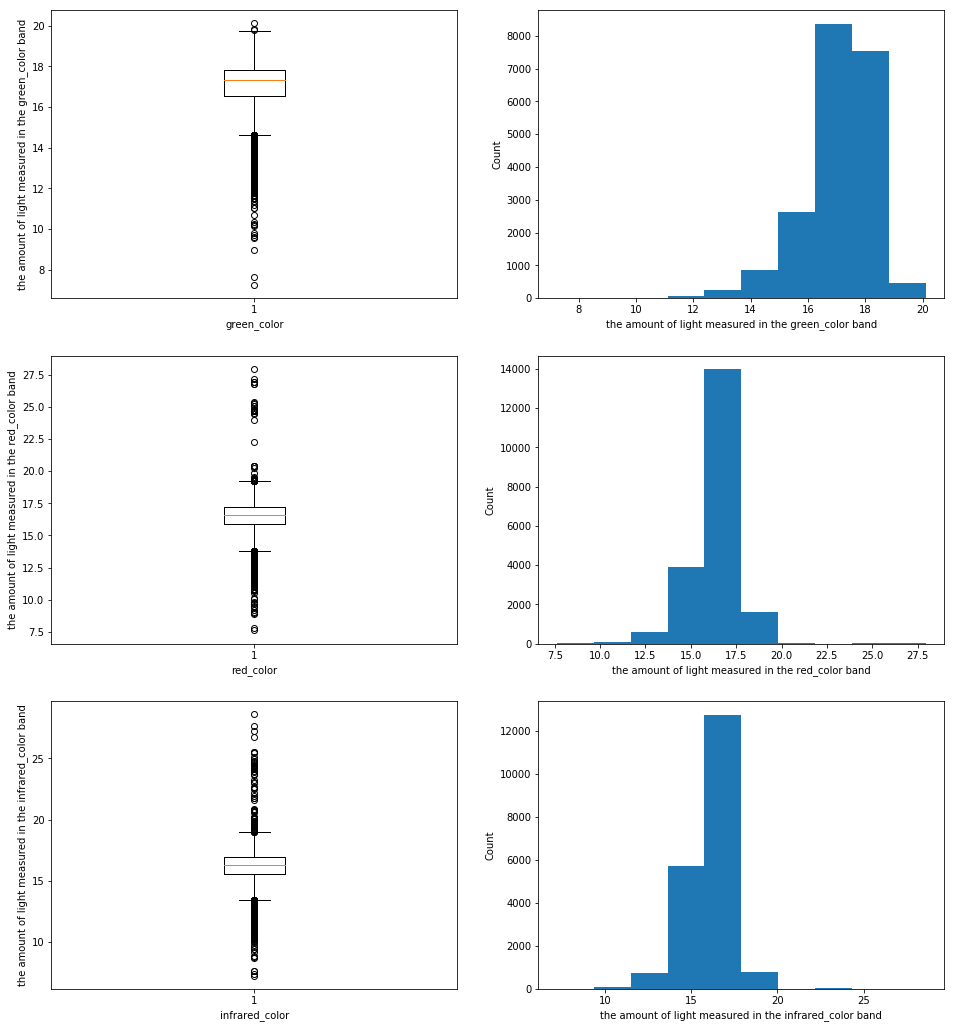

In [314]:
color_cols = ['green_color','red_color','infrared_color']

fig, axs = plt.subplots(3,2,figsize=(16,18))
for i in range(3):
    col = color_cols[i]
    axs[i,0].boxplot(galaxy_df[col])
    axs[i,0].set_ylabel('the amount of light measured in the {} band'.format(str(col)))
    axs[i,0].set_xlabel(str(col))
    
    axs[i,1].hist(galaxy_df[col])
    axs[i,1].set_ylabel('Count')
    axs[i,1].set_xlabel('the amount of light measured in the {} band'.format(str(col)))

**Based on the histogram and the boxplot, we could see that the data is skewed. Thus, we choose to filter values between $Q1-2.5 \times IQR$ and $Q3+2.5 \times IQR$.**

In [315]:
def outlier_detect(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    left_bound = Q1 - 2.5*IQR
    right_bound = Q3 + 2.5*IQR
    outliers = ((df[col] < left_bound) | (df[col] > right_bound))
    return df.index[outliers].tolist()

outliers_set = set()
for i in range(3):
    col = color_cols[i]
    outlier = outlier_detect(col, galaxy_df)
    outliers_set = outliers_set | set(outlier)

outliers_list = list(outliers_set)
number_outliers = len(outliers_list)

percent_outliers = number_outliers/galaxy_df.shape[0]

galaxy_df = galaxy_df.drop(index = outliers_list)

print("Exclude {}% of outliers from the dataset".format(percent_outliers*100))

Exclude 1.6955875061973227% of outliers from the dataset


1.2.2

In [316]:
ep_df = galaxy_df[galaxy_df['class']=='elliptical']
notep_df = galaxy_df[galaxy_df['class']!='elliptical']

ep_df_x = ep_df[ep_df.columns.difference(['class'])]
notep_df_x = notep_df[ep_df.columns.difference(['class'])]

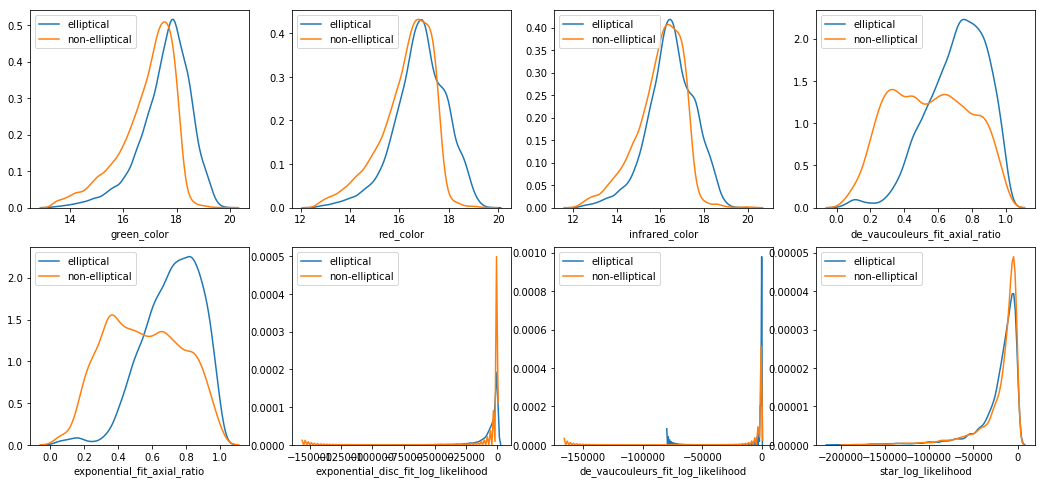

In [317]:
import seaborn as sns

galaxy_columns = galaxy_df.columns.tolist()
fig, axes = plt.subplots(figsize=(18,8), ncols=4, nrows=2)
for i, ax in zip(galaxy_columns, axes.flat):
    sns.distplot(ep_df_x[i], hist=False, ax=ax, label='elliptical')
    sns.distplot(notep_df_x[i], hist=False, ax=ax, label='non-elliptical')
plt.show()

**Among these features, "de_vaucouleurs_fit_axial_ratio", "exponential_fit_axial_ratio", exponential_disc_fit_log_likelihood" and "de_vaucouleurs_fit_log_likelihood" distributed differently in elliptical galaxies and other types of objects in the sky. The color features including "green_color", "red_color" and "infrared_color" display similar distribution bwteen two groups, but with slight difference. The rest feature "star_log_likelihood" does not differ very much between two groups.** 

1.3

Text(0.5, 0, 'red_infrared_diff')

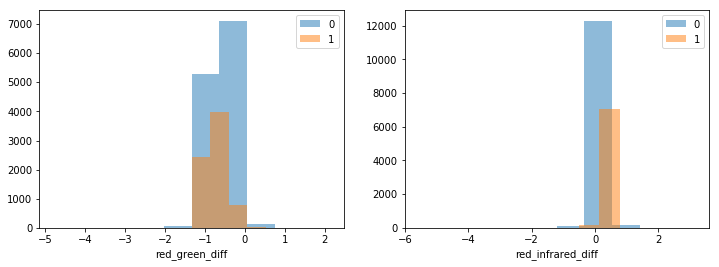

In [318]:
# create the binary column for the outcome
galaxy_df['elliptical'] = [int(i) for i in galaxy_df['class'] == 'elliptical']
galaxy_df['non_elliptical'] = [int(i) for i in galaxy_df['class'] != 'elliptical']


galaxy_df['red_green_diff'] = galaxy_df['red_color'] - galaxy_df['green_color']
galaxy_df['red_infrared_diff'] = galaxy_df['red_color'] - galaxy_df['infrared_color']

galaxy_color_diff_df = galaxy_df[['red_green_diff','red_infrared_diff','elliptical']]
groups = galaxy_color_diff_df.groupby('elliptical')

fig, axs = plt.subplots(1, 2, figsize = (12,4))
for name, group in groups['red_green_diff']:
    axs[0].hist(group, alpha = 0.5, label = str(name))
axs[0].legend()
axs[0].set_xlabel('red_green_diff')
for name, group in groups['red_infrared_diff']:
    axs[1].hist(group, alpha = 0.5, label = str(name))
axs[1].legend()
axs[1].set_xlabel('red_infrared_diff')

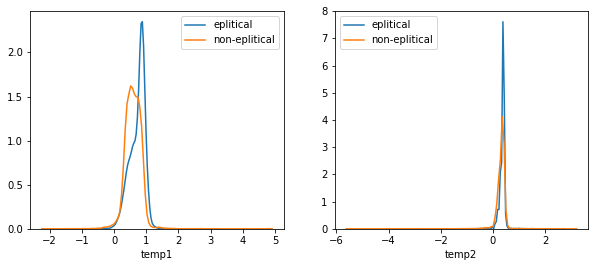

In [319]:
ep_df_x['temp1'] = ep_df_x['green_color']-ep_df_x['red_color']
ep_df_x['temp2'] = ep_df_x['red_color']-ep_df_x['infrared_color']
notep_df_x['temp1'] = notep_df_x['green_color']-notep_df_x['red_color']
notep_df_x['temp2'] = notep_df_x['red_color']-notep_df_x['infrared_color']

fig, axes= plt.subplots(figsize=(10,4), ncols=2, nrows=1)
sns.distplot(ep_df_x['temp1'], hist=False, ax=axes[0], label='eplitical')
sns.distplot(notep_df_x['temp1'], hist=False, ax=axes[0], label='non-eplitical')
sns.distplot(ep_df_x['temp2'], hist=False, ax=axes[1], label='eplitical')
sns.distplot(notep_df_x['temp2'], hist=False, ax=axes[1], label='non-eplitical')
plt.show()

**We created two temprature features. One is 'green-red', and the other one is 'red-infrared'. The centers of distributions of these two features between two groups are similar, but distributions of eplitical samples are "narrower", which means eplitical samples distributed more centrally. Therefore, these two new features are useful for the classification task. **

1.4

In [320]:
#1.4 model
galaxy_train, galaxy_test = train_test_split(galaxy_df, 
                                             test_size = 0.3,
                                             random_state = 0,
                                             stratify = galaxy_df['elliptical'])

drop_cols = ['elliptical','non_elliptical','class']
X_train = galaxy_train.drop(drop_cols, axis = 1).values
y_train = galaxy_train['elliptical'].values.reshape(-1,1)

X_test = galaxy_test.drop(drop_cols, axis = 1).values
y_test = galaxy_test['elliptical'].values.reshape(-1,1)
X_train.shape, y_train.shape

((13879, 10), (13879, 1))

In [321]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [330]:
epochs = 150
learning_rate = 0.01
decay_rate = learning_rate/epochs
momentum = 0.8
#nadam= optimizers.Nadam(lr = learning_rate)
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)

input_dim = X_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(3, activation='relu', kernel_initializer='uniform', 
                input_dim = input_dim)) 
lr_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# compile the model
lr_model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [331]:
%%time
# Fit the model
batch_size = 1024

lr_model_history = lr_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 13879 samples, validate on 5949 samples
Epoch 1/150
13879/13879 [==============================] - 1s 106us/step - loss: 0.6899 - acc: 0.5956 - val_loss: 0.6844 - val_acc: 0.6361
Epoch 2/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6802 - acc: 0.6360 - val_loss: 0.6756 - val_acc: 0.6361
Epoch 3/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6726 - acc: 0.6360 - val_loss: 0.6695 - val_acc: 0.6361
Epoch 4/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6673 - acc: 0.6360 - val_loss: 0.6651 - val_acc: 0.6361
Epoch 5/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6636 - acc: 0.6360 - val_loss: 0.6621 - val_acc: 0.6361
Epoch 6/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6610 - acc: 0.6360 - val_loss: 0.6599 - val_acc: 0.6361
Epoch 7/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.6591 - acc: 0.6360 - val_loss: 0.6582 - val_ac

13879/13879 [==============================] - 0s 2us/step - loss: 0.4006 - acc: 0.8617 - val_loss: 0.4030 - val_acc: 0.8660
Epoch 61/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3984 - acc: 0.8624 - val_loss: 0.4008 - val_acc: 0.8669
Epoch 62/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3963 - acc: 0.8626 - val_loss: 0.3987 - val_acc: 0.8677
Epoch 63/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3943 - acc: 0.8644 - val_loss: 0.3967 - val_acc: 0.8680
Epoch 64/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3925 - acc: 0.8643 - val_loss: 0.3949 - val_acc: 0.8685
Epoch 65/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3907 - acc: 0.8653 - val_loss: 0.3931 - val_acc: 0.8701
Epoch 66/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3891 - acc: 0.8658 - val_loss: 0.3915 - val_acc: 0.8704
Epoch 67/150
13879/13879 [=====================

13879/13879 [==============================] - 0s 2us/step - loss: 0.3452 - acc: 0.8835 - val_loss: 0.3504 - val_acc: 0.8849
Epoch 120/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3446 - acc: 0.8833 - val_loss: 0.3499 - val_acc: 0.8857
Epoch 121/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3442 - acc: 0.8843 - val_loss: 0.3495 - val_acc: 0.8855
Epoch 122/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3436 - acc: 0.8838 - val_loss: 0.3490 - val_acc: 0.8852
Epoch 123/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3431 - acc: 0.8843 - val_loss: 0.3485 - val_acc: 0.8857
Epoch 124/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3426 - acc: 0.8849 - val_loss: 0.3481 - val_acc: 0.8862
Epoch 125/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.3421 - acc: 0.8848 - val_loss: 0.3477 - val_acc: 0.8864
Epoch 126/150
13879/13879 [==============

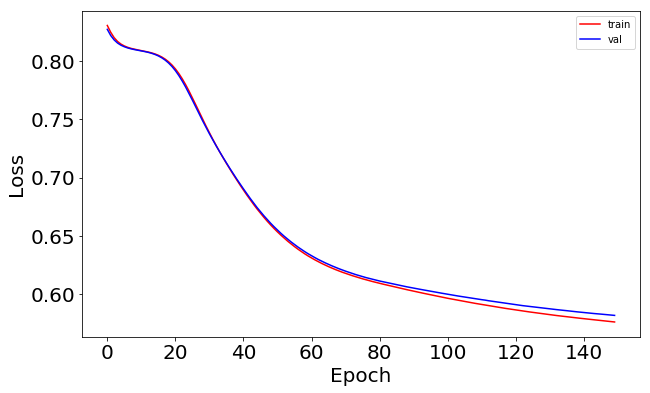

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

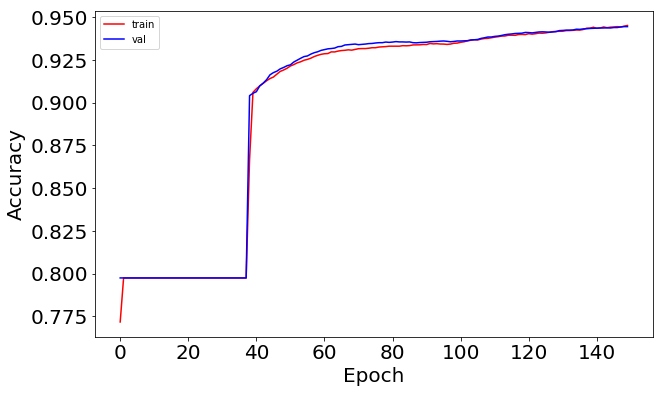

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [334]:
y_train_pred = lr_model.predict_classes(X_train)
y_test_pred = lr_model.predict_classes(X_test)

acc = lr_model.evaluate(X_train, y_train, batch_size=batch_size)[1]
print('Train accuracy:', acc)

acc = lr_model.evaluate(X_test, y_test, batch_size=batch_size)[1]
print('Test accuracy:', acc)

13879/13879 [==============================] - 0s 1us/step
Train accuracy: 0.8941566387500223
5949/5949 [==============================] - 0s 1us/step
Test accuracy: 0.8920827062115145


1.5

In [335]:
len(y_train[y_train==0])/len(y_train[y_train==1])

1.7472288202692003

In [338]:
from sklearn.utils import class_weight

# Use class_weight to deal with the imbalanced data
class_weight = {0:1, 1:1.75}

# Fit model with class_weight
lr_model_history = lr_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    class_weight=class_weight,
                    validation_data=(X_test, y_test))

Train on 13879 samples, validate on 5949 samples
Epoch 1/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4097 - acc: 0.8992 - val_loss: 0.3138 - val_acc: 0.8939
Epoch 2/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4096 - acc: 0.8995 - val_loss: 0.3140 - val_acc: 0.8943
Epoch 3/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4096 - acc: 0.8992 - val_loss: 0.3138 - val_acc: 0.8941
Epoch 4/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4096 - acc: 0.8995 - val_loss: 0.3138 - val_acc: 0.8946
Epoch 5/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4095 - acc: 0.8999 - val_loss: 0.3137 - val_acc: 0.8944
Epoch 6/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4095 - acc: 0.8994 - val_loss: 0.3140 - val_acc: 0.8938
Epoch 7/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4095 - acc: 0.9000 - val_loss: 0.3137 - val_acc:

13879/13879 [==============================] - 0s 2us/step - loss: 0.4080 - acc: 0.9003 - val_loss: 0.3138 - val_acc: 0.8951
Epoch 61/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4080 - acc: 0.9009 - val_loss: 0.3135 - val_acc: 0.8951
Epoch 62/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4080 - acc: 0.9006 - val_loss: 0.3135 - val_acc: 0.8949
Epoch 63/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4079 - acc: 0.9004 - val_loss: 0.3136 - val_acc: 0.8949
Epoch 64/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4079 - acc: 0.9004 - val_loss: 0.3135 - val_acc: 0.8953
Epoch 65/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4079 - acc: 0.9009 - val_loss: 0.3136 - val_acc: 0.8951
Epoch 66/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4078 - acc: 0.9004 - val_loss: 0.3138 - val_acc: 0.8948
Epoch 67/150
13879/13879 [=====================

13879/13879 [==============================] - 0s 2us/step - loss: 0.4066 - acc: 0.9022 - val_loss: 0.3129 - val_acc: 0.8954
Epoch 120/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4066 - acc: 0.9028 - val_loss: 0.3133 - val_acc: 0.8953
Epoch 121/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4066 - acc: 0.9014 - val_loss: 0.3136 - val_acc: 0.8946
Epoch 122/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4066 - acc: 0.9021 - val_loss: 0.3133 - val_acc: 0.8949
Epoch 123/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4065 - acc: 0.9022 - val_loss: 0.3130 - val_acc: 0.8949
Epoch 124/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4065 - acc: 0.9029 - val_loss: 0.3129 - val_acc: 0.8948
Epoch 125/150
13879/13879 [==============================] - 0s 2us/step - loss: 0.4065 - acc: 0.9024 - val_loss: 0.3133 - val_acc: 0.8951
Epoch 126/150
13879/13879 [==============

In [339]:
from sklearn.metrics import classification_report

y_train_pred_new = lr_model.predict_classes(X_train)
y_test_pred_new = lr_model.predict_classes(X_test)
target_names = ['Epllitical', 'Non-epllitical']
print("Original_train", classification_report(y_train, y_train_pred, target_names=target_names))
print("Original_test", classification_report(y_test, y_test_pred, target_names=target_names))
print("Improved_train",classification_report(y_train, y_train_pred_new, target_names=target_names))
print("Improved_test", classification_report(y_test, y_test_pred_new, target_names=target_names))

Original_train                 precision    recall  f1-score   support

    Epllitical       0.91      0.93      0.92      8827
Non-epllitical       0.87      0.83      0.85      5052

     micro avg       0.89      0.89      0.89     13879
     macro avg       0.89      0.88      0.88     13879
  weighted avg       0.89      0.89      0.89     13879

Original_test                 precision    recall  f1-score   support

    Epllitical       0.91      0.93      0.92      3784
Non-epllitical       0.87      0.83      0.85      2165

     micro avg       0.89      0.89      0.89      5949
     macro avg       0.89      0.88      0.88      5949
  weighted avg       0.89      0.89      0.89      5949

Improved_train                 precision    recall  f1-score   support

    Epllitical       0.94      0.90      0.92      8827
Non-epllitical       0.84      0.91      0.87      5052

     micro avg       0.90      0.90      0.90     13879
     macro avg       0.89      0.90      0.90     13

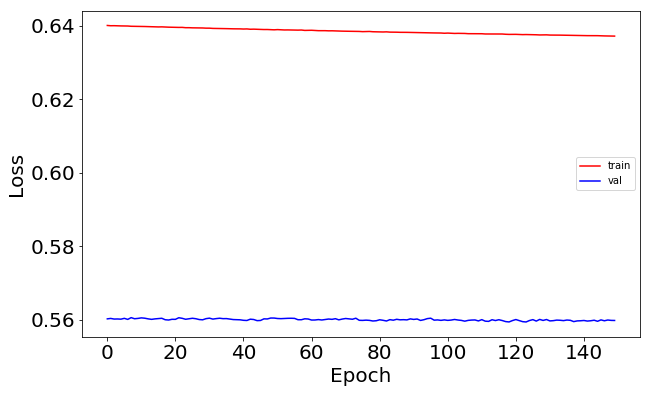

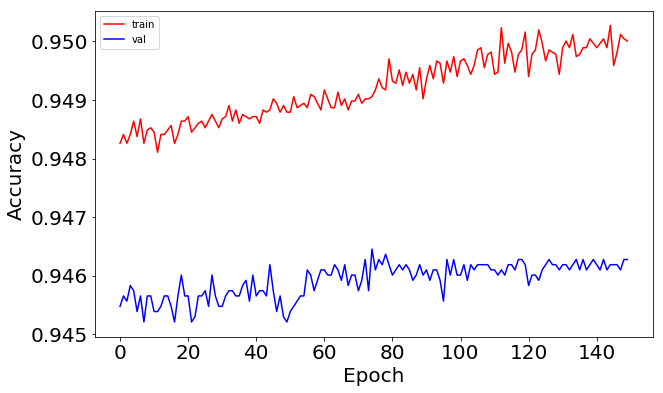

In [340]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

**The average classification accuracy is not a good metric for there are much more non-epllitical objects than epllitical galaxies in this data. In other words, this data is imbalanced and there are more negative examples. In this case, using precision metric is more appropriate.                
Precision =# True positives / # predicted positive = TP/(TP+FP)     
Precision is not affected by a large number of negative samples, that’s because it measures the number of true positives out of the samples predicted as positives (TP+FP).    
Precision is more focused in the positive class than in the negative class, it actually measures the probability of correct detection of positive values, while FPR and TPR (ROC metrics) measure the ability to distinguish between the classes.  **            

**For this question, after correcting for the imbalanced data by adding 'class_weight' into the model fit process, precision of the model on both training and validation datasets are improved. **

<div class='exercise'><b> Question 2: Optimization Problems in Model Training </b></div>

In Question 1, you found an appropriate choice of training parameters for your model (e.g. optimizer, learning rate etc). In this problem, you will carefully investigate the effect of these parameters on the baseline model from Question 1.

<span class='sub-q'> 2.1 </span> Using the Adam optimizer, plot the loss function as well as the average classification accuracy [PP: training accuracies] for each of the following learning rates `[1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4]`. Compare these graphs and make an argument for which of these learning rates is more appropriate for our data set.

<span class='sub-q'> 2.2 </span> Using the SGD optimizer, plot the loss function as well as the average classification accuracy for each of the following learning rates `[1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4]`. Compare these graphs and make an argument for which of these learning rates is more appropriate for our data set. For the optimal learning rate, experiment with a range of values for momentum, `[9e-1, 8e-1, 7e-1, 6e-1, 5e-1, 4e-1]` with a learning rate decay of `optimal_rate / total_epochs`. Make an argument for which value of momentum is more appropriate for our data set.

<span class='sub-q'> 2.3 </span> Compare model training using Adam versus SGD:
- describe the difference between the behaviors of these two optimizers. 
- which optimizer gives the best model at the end of say 5000 epochs?

Which optimization method do you prefer for this data set? Why? 
Think of some scenarios where each optimizer might be more appropriate than the other.

Other parameters for optimization include more complex decay rates, you can [read more](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2) about how these choices affect training.

**2.1**

In [341]:
epochs = 150
learning_rates = [1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4]
adam_models = []
adam_models_history = []

for lr in learning_rates:
    adam = optimizers.Adam(lr = lr)
    
    input_dim = X_train.shape[1]
    adam_model = Sequential()
    adam_model.add(Dense(3, activation='relu', kernel_initializer='uniform', 
                input_dim = input_dim)) 
    adam_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # compile the model
    adam_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])
    batch_size = 1024
    
    adam_model_history = adam_model.fit(X_train, y_train,
                                        batch_size=batch_size,
                                        epochs=epochs, verbose=0,
                                        validation_data=(X_test, y_test))
    
    adam_models.append(adam_model)
    adam_models_history.append(adam_model_history)

In [342]:
def plotModel(learning_rates, models_history):
    plt.figure(figsize=(22,15))
    plt.subplots_adjust(hspace = 0.3,wspace=0.3) 
    ind = 1
    
    for i,j in zip(learning_rates, models_history):
        plt.subplot(3, 4, ind)
        plt.plot(np.sqrt(j.history['acc']), 'r', label='train')
        plt.plot(np.sqrt(j.history['val_acc']), 'b',label='train')
        plt.xlabel(r'Epoch', fontsize=12)
        plt.ylabel(r'Accuracy', fontsize=12)
        plt.legend(fontsize=12)
        plt.title("Rate = " + str(i), fontsize=12)
        plt.tick_params(labelsize=12)
        ind = ind+1
        
        plt.subplot(3, 4, ind)
        plt.plot(np.sqrt(j.history['loss']), 'r', label='train')
        plt.plot(np.sqrt(j.history['val_loss']), 'b' ,label='val')
        plt.xlabel(r'Epoch', fontsize=12)
        plt.ylabel(r'Loss', fontsize=12)
        plt.legend(fontsize=12)
        plt.title("Rate = " + str(i), fontsize=12)
        plt.tick_params(labelsize=12)
        ind = ind+1

In [343]:
def plotModelCombine(learning_rates, models_history):
    plt.figure(figsize=(10,16))
    #plt.subplots_adjust(hspace = 0.3) 
    
    for i,j in zip(learning_rates, models_history):
        plt.subplot(2, 1, 1)
        plt.plot(np.sqrt(j.history['acc']), label='lr='+str(i))
        plt.xlabel(r'Epoch', fontsize=12)
        plt.ylabel(r'Accuracy', fontsize=12)
        plt.legend(fontsize=12)
        plt.title("Accuracy", fontsize=18)
        plt.tick_params(labelsize=12)
        
        plt.subplot(2, 1, 2)
        plt.plot(np.sqrt(j.history['loss']), label='lr='+str(i))
        plt.xlabel(r'Epoch', fontsize=12)
        plt.ylabel(r'Loss', fontsize=12)
        plt.legend(fontsize=12)
        plt.title("Loss", fontsize=18)
        plt.tick_params(labelsize=12)

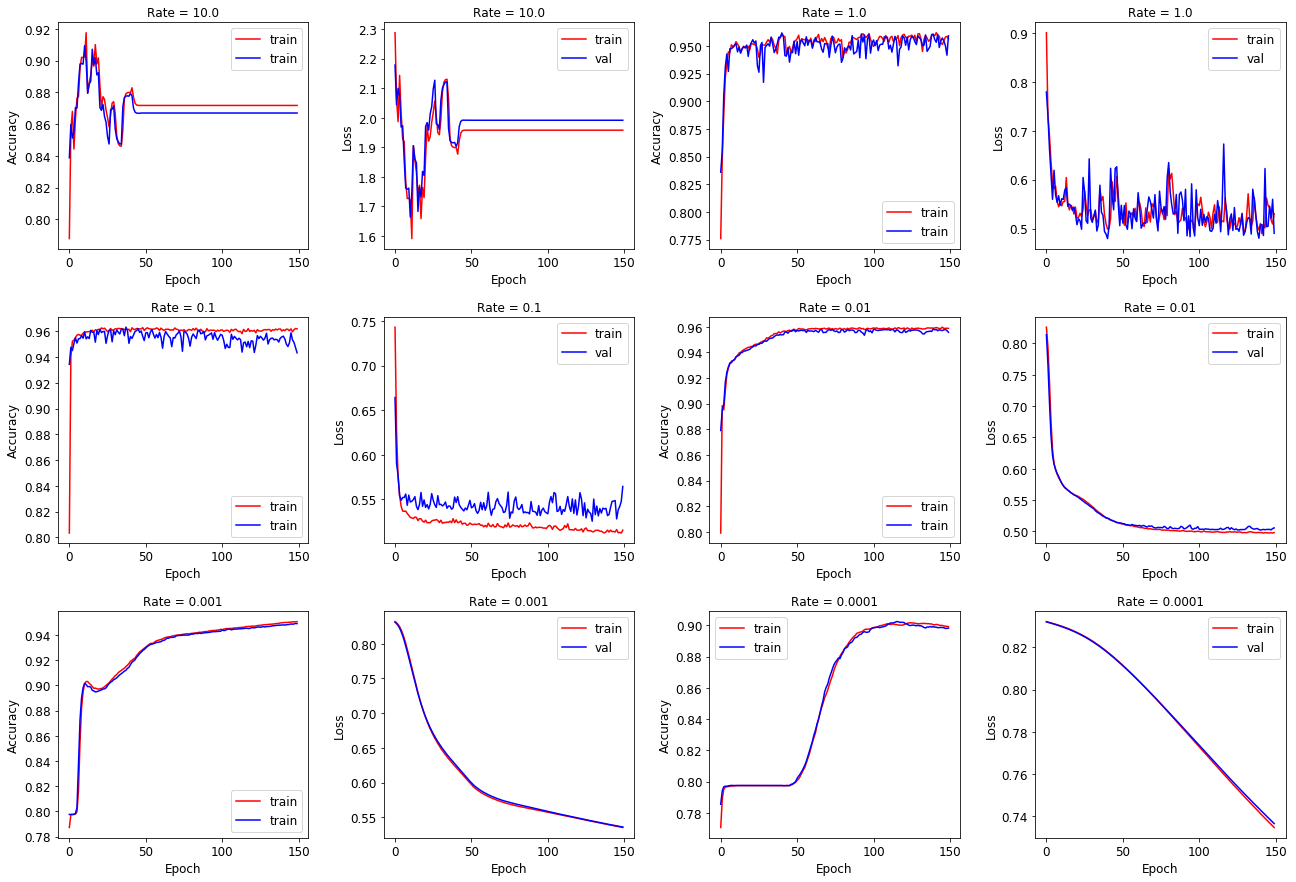

In [344]:
plotModel(learning_rates, adam_models_history)

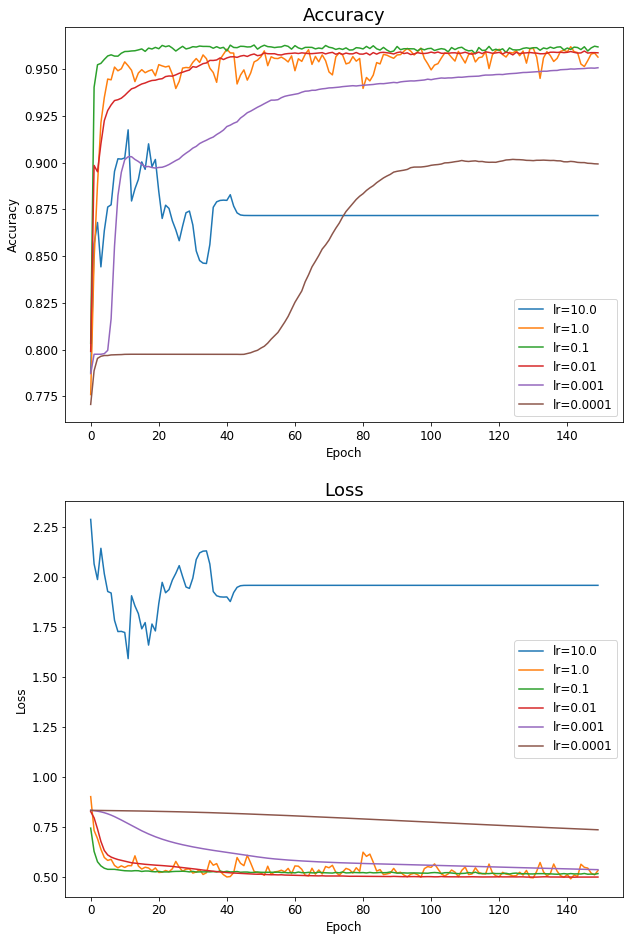

In [345]:
plotModelCombine(learning_rates, adam_models_history)

**Based on the plots above, we can clearly see that when learning rate is 0.1, the model with adam optimizer performs best on our dataset. Because when learning rate is 0.1, the model reaches highest accuracy and lowest loss very fast and does not have much fluctuation. **

**2.2**

In [305]:
epochs = 150
batch_size = 1024
learning_rates = [1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4]
sgd_models = []
sgd_models_history = []

for lr in learning_rates:
    sgd = optimizers.SGD(lr = lr)
    
    input_dim = X_train.shape[1]
    sgd_model = Sequential()
    sgd_model.add(Dense(3, activation='relu', kernel_initializer='uniform', 
                input_dim = input_dim)) 
    sgd_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # compile the model
    sgd_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
    
    sgd_model_history = sgd_model.fit(X_train, y_train,
                                      batch_size=batch_size,
                                      epochs=epochs, verbose=0,
                                      validation_data=(X_test, y_test))
    
    sgd_models.append(sgd_model)
    sgd_models_history.append(sgd_model_history)

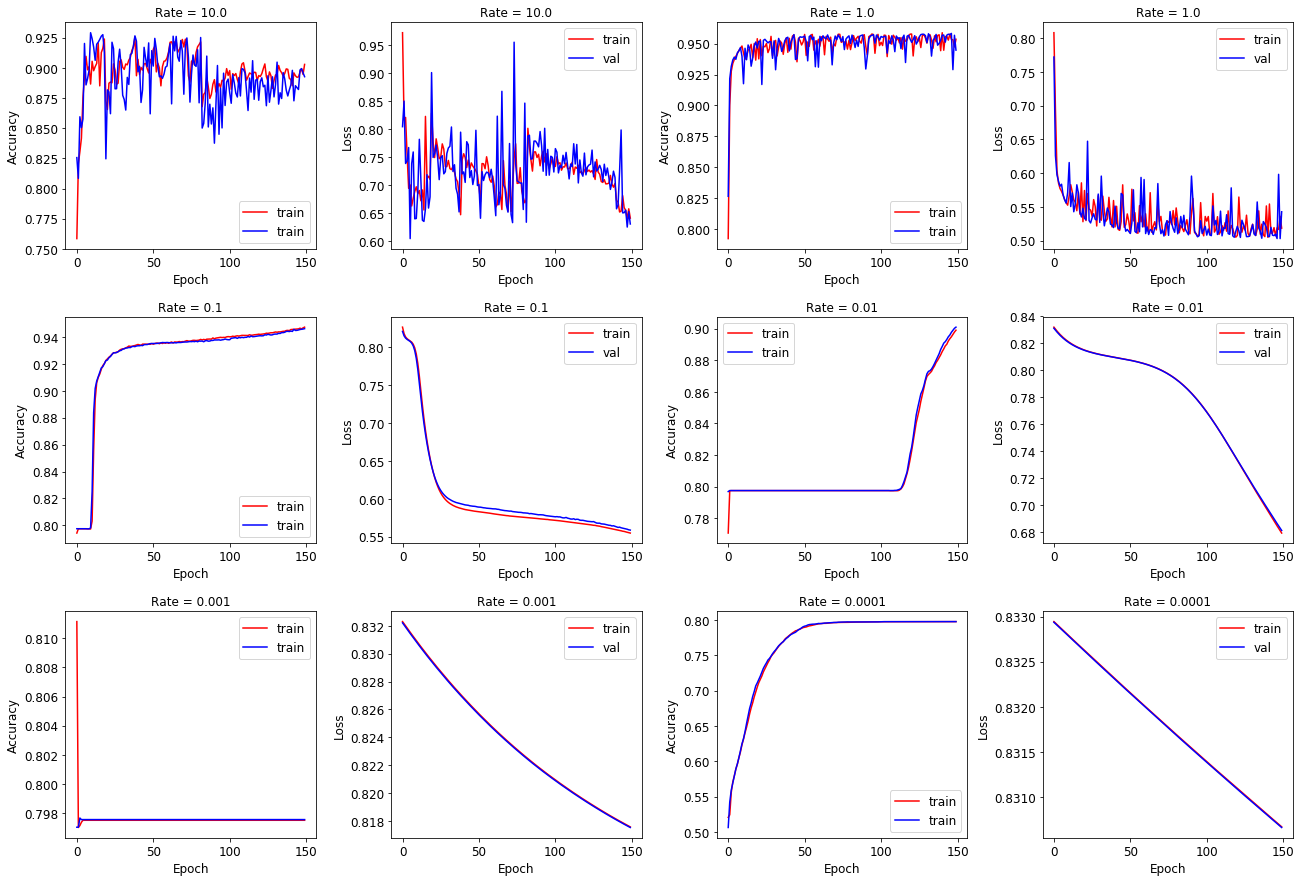

In [346]:
plotModel(learning_rates, sgd_models_history)

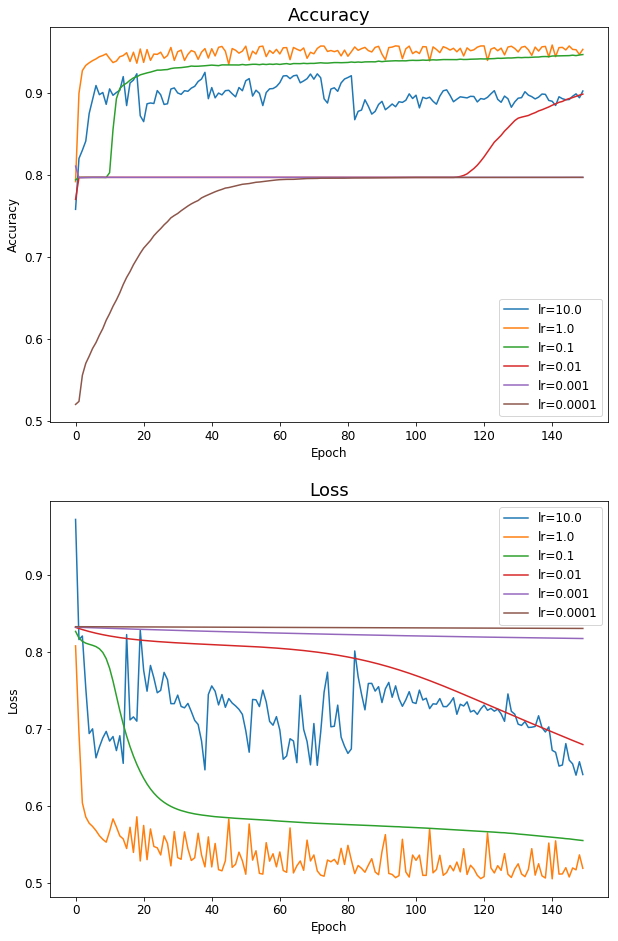

In [347]:
plotModelCombine(learning_rates, sgd_models_history)

**Based on the plots above, we can clearly see that when learning rate is 0.1, the model with SGD optimizer performs best on our dataset. Because when learning rate is 1.0, the model reaches highest accuracy and lowest loss very fast. **

In [348]:
train_scores = []
test_scores = []
train_accs = []
test_accs = []

for model in sgd_models:
    train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
    test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)
    train_scores.append(train_score)
    test_scores.append(train_score)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

5949/5949 [==============================] - 0s 1us/step


In [349]:
sgd_lr_df = pd.DataFrame({'learning_rate': learning_rates,
                          'train_loss': train_scores, 'test_loss': test_scores, 
                          'train_acc': train_accs, 'test_acc': test_accs})
sgd_lr_df

,learning_rate,train_loss,test_loss,train_acc,test_acc
0,10.0000,0.398094,0.398094,0.802868,0.796773
1,1.0000,0.303263,0.303263,0.888032,0.892587
2,0.1000,0.307071,0.307071,0.897399,0.895108
3,0.0100,0.460505,0.460505,0.808992,0.811565
4,0.0010,0.668345,0.668345,0.635997,0.636073
5,0.0001,0.690003,0.690003,0.635997,0.636073


In [350]:
optimal_rate = learning_rates[test_accs.index(max(test_accs))]
optimal_rate

0.1

In [361]:
# choose momentum
epochs = 150
batch_size = 1024
momentums = [9e-1, 8e-1, 7e-1, 6e-1, 5e-1, 4e-1]
sgd_mmt_models = []
sgd_mmt_models_history = []

for mmt in momentums:
    sgd = optimizers.SGD(lr = optimal_rate, momentum = mmt, decay = optimal_rate/epochs)
    
    input_dim = X_train.shape[1]
    sgd_model = Sequential()
    sgd_model.add(Dense(3, activation='relu', kernel_initializer='uniform', 
                input_dim = input_dim)) 
    sgd_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # compile the model
    sgd_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
    
    sgd_model_history = sgd_model.fit(X_train, y_train,
                                      batch_size=batch_size,
                                      epochs=epochs, verbose=0,
                                      validation_data=(X_test, y_test))
    
    sgd_mmt_models.append(sgd_model)
    sgd_mmt_models_history.append(sgd_model_history)

In [362]:
train_scores = []
test_scores = []
train_accs = []
test_accs = []

for model in sgd_mmt_models:
    train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
    test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)
    train_scores.append(train_score)
    test_scores.append(train_score)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
sgd_mmt_df = pd.DataFrame({'learning_rate': learning_rates,
                          'train_loss': train_scores, 'test_loss': test_scores, 
                          'train_acc': train_accs, 'test_acc': test_accs})
sgd_mmt_df

5949/5949 [==============================] - 0s 1us/step


,learning_rate,train_loss,test_loss,train_acc,test_acc
0,10.0000,0.315294,0.315294,0.888320,0.884350
1,1.0000,0.236142,0.236142,0.924346,0.921668
2,0.1000,0.238019,0.238019,0.923409,0.919650
3,0.0100,0.278986,0.278986,0.919879,0.917465
4,0.0010,0.270443,0.270443,0.914403,0.910909
5,0.0001,0.250550,0.250550,0.917789,0.914608


In [363]:
optimal_mmt = learning_rates[test_accs.index(max(test_accs))]
optimal_mmt

1.0

**When the momentum is 1.0, the SGD model with learning rate of 1.0 has highest accuray. Thus 1.0 is the most appropriate momentum. **

2.3

**Overall, Adam performs higher training speed than SGD, and SGD with momentum tends to have more bouncing than Adam.          
At the end of 5000 epochs, SGD would perform better than Adam as adaptive optimizers have larger update value when they reach steady state.             
Adam is an adaptive learning rate method. Its algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. Despite superior training time, Adam in some areas does not converge to an optimal solution, so for some tasks (such as image classification on popular CIFAR datasets) state-of-the-art results are still only achieved by applying SGD with momentum. When dealing with diverse set of deep leaning tasks, adaptive methods, such as Adam do not generalize as well as SGD with momentum. In earlier stages of training Adam would probably outperforms SGD but later the learning would saturate.     
For this data set, I think Adam is better. Because the deep learning task is not very complex and Adam can provide superior training time. **

<div class='exercise'><b> Question 3: Generalizing Models for Galaxy Classification </b></div>

In this problem, you will revisit the task of classifying galaxies based on visual morphology. You will deploy the model you built in Question 1 on a new, much larger sky survey. In this new data set, which for now we will assume it represents the true Universe, only a small number of observations have been labeled. Your goal is to estimate the proportion of elliptical galaxies in the Universe.
<br><br>**Note** There are multiple *correct* answers to these questions. What we are looking for is a scientific approach to support your arguments with empirical evidences or first principles. 

<span class='sub-q'> 3.1 </span> Use the model you built in Question 1 to estimate the proportion of ellipticall galaxies. Is this estimate trust worthy? Why or why not? 

<span class='sub-q'> 3.2 </span> The performance of classifier will perform differently on this new data set than it does on the data the model was trained (and tested on) in question 1. This is a common occurance in machine learning. Identify and eliminate at least one likely cause of this performance difference in the data. 

(***Hint:*** perform some exploratory data analysis on the new data and compare the features distributions of the data set in question 1 and of the data in this question)

<span class='sub-q'> 3.3 (Implementation not required) </span>  Based on your observations, propose a method to produce an accurate estimate of the proportion of elliptical galaxies in the new data set, support your proposal with results from data analysis and concepts from data science. 

<span class='sub-q'> 3.1

In [285]:
universe_df = pd.read_csv('data/galaxy_morphology_semi_labeled.csv')
universe_df.head()

,green_color,red_color,infrared_color,de_vaucouleurs_fit_axial_ratio,exponential_fit_axial_ratio,exponential_disc_fit_log_likelihood,de_vaucouleurs_fit_log_likelihood,star_log_likelihood,number_of_votes,probability_elliptical,probability_spiral,probability_unknown,probability_merger,class
0,20.597660,19.763248,19.377018,0.890790,0.887719,-365.51312,-10296.39500,-69448.500,NaN,NaN,NaN,NaN,NaN,NaN
1,16.068602,14.275770,13.406208,0.846962,0.583541,-12756.09600,-32272.31200,-203823.920,NaN,NaN,NaN,NaN,NaN,NaN
2,25.601834,23.291614,24.511544,0.699872,0.749809,-86.31708,-227.30617,-1036.990,NaN,NaN,NaN,NaN,NaN,NaN
3,22.686954,20.837614,20.032396,0.705292,0.655978,-8858.64400,-1597.61410,-38869.620,NaN,NaN,NaN,NaN,NaN,NaN
4,20.464190,19.271786,18.617180,0.470536,0.424177,-1635.48885,-11248.65150,-83958.805,NaN,NaN,NaN,NaN,NaN,NaN


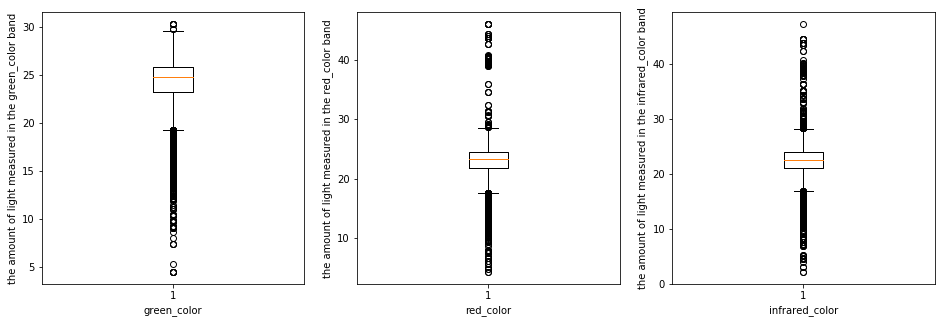

In [286]:
fig, axs = plt.subplots(1,3,figsize=(16,5))
for i in range(3):
    col = color_cols[i]
    axs[i].boxplot(universe_df[col])
    axs[i].set_ylabel('the amount of light measured in the {} band'.format(str(col)))
    axs[i].set_xlabel(str(col))

In [287]:
outliers_set = set()
for i in range(3):
    col = color_cols[i]
    outlier = outlier_detect(col, universe_df)
    outliers_set = outliers_set | set(outlier)

outliers_list = list(outliers_set)
number_outliers = len(outliers_list)

percent_outliers = number_outliers/universe_df.shape[0]

universe_df = universe_df.drop(index = outliers_list)

print("Exclude {}% of outliers from the dataset".format(percent_outliers*100))

Exclude 1.7120738424892066% of outliers from the dataset


In [288]:
universe_df['red_green_diff'] = universe_df['red_color'] - universe_df['green_color']
universe_df['red_infrared_diff'] = universe_df['red_color'] - universe_df['infrared_color']
univ_dropcols = ['probability_elliptical', 'probability_spiral', 'probability_unknown', 
                 'class','probability_merger', 'number_of_votes']
X_univ = universe_df.drop(univ_dropcols, axis=1).values
X_univ.shape

(46214, 10)

In [289]:
# Use the scaler fitted on the galaxy_train data to standardize universe_df
X_univ_scaled = std_scaler.transform(X_univ)

In [290]:
for i in range(0,3):
    print(X_univ_scaled[:,i].mean())
    print(X_univ_scaled[:,i].std())

6.850729144427917
2.0262472658239448
5.999830049050722
2.046017899837327
5.608094419387316
2.04789442034282


**The result above shows that using the scaler fitted on the galaxy_train data cannot standardize universe_df successfully. **

In [291]:
y_univ_pred = lr_model.predict_classes(X_univ_scaled)
ep_prop = sum(y_univ_pred)/len(y_univ_pred)
print("The proportion of elliptical galaxies is", ep_prop[0])

The proportion of elliptical galaxies is 0.9912796987925737


In [272]:
univ_labeled = universe_df.dropna(axis=0)
X_univ_labeled = univ_labeled.drop(univ_dropcols, axis = 1).values
y_univ_labeled = np.array([int(i) for i in univ_labeled['class'] == 'elliptical']).reshape(-1,1)
univ_labeled.head()

,green_color,red_color,infrared_color,de_vaucouleurs_fit_axial_ratio,exponential_fit_axial_ratio,exponential_disc_fit_log_likelihood,de_vaucouleurs_fit_log_likelihood,star_log_likelihood,number_of_votes,probability_elliptical,probability_spiral,probability_unknown,probability_merger,class,red_green_diff,red_infrared_diff
42317,20.597660,19.763248,19.377018,0.890790,0.887719,-365.51312,-10296.39500,-69448.500,38.0,0.289,0.632,0.053,0.026,spiral,-0.834412,0.386230
42319,25.601834,23.291614,24.511544,0.699872,0.749809,-86.31708,-227.30617,-1036.990,27.0,0.037,0.037,0.926,0.000,unknown,-2.310220,-1.219930
42320,22.686954,20.837614,20.032396,0.705292,0.655978,-8858.64400,-1597.61410,-38869.620,60.0,0.300,0.000,0.050,0.650,merger,-1.849340,0.805218
42321,20.464190,19.271786,18.617180,0.470536,0.424177,-1635.48885,-11248.65150,-83958.805,57.0,0.614,0.386,0.000,0.000,elliptical,-1.192404,0.654606
42322,22.450638,20.765380,19.940306,0.856139,0.789352,-23537.34450,-2580.64635,-55257.598,31.0,0.774,0.000,0.194,0.032,elliptical,-1.685258,0.825074


In [273]:
y_univ_labeled_pred = lr_model.predict_classes(X_univ_labeled)
print(classification_report(y_univ_labeled, y_univ_labeled_pred, target_names=target_names))

                precision    recall  f1-score   support

    Epllitical       0.00      0.00      0.00      2457
Non-epllitical       0.47      1.00      0.64      2164

     micro avg       0.47      0.47      0.47      4621
     macro avg       0.23      0.50      0.32      4621
  weighted avg       0.22      0.47      0.30      4621



/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**We predict the classes of objects on the entire new dataset using the improved model from Q1. The result shows that the estimated proportion of elliptical galaxies in the universe is 99%, which doesn't make any sense. We also perform the prediction only on the labeled part of this dataset to evaluate the classification. The result shows that the precision of the model on the new dataset is very low. Therefore, the proportion of elliptical galaxies estimated using our model is not trustworthy. In addition, we also looked up some literatures and found out that the real proportion of elliptical galaxies in the universe should be around 20%. This also indicates that the estimated proportion is not trustworthy.**

<span class='sub-q'> 3.2

In [293]:
ep_univ = universe_df[universe_df['class']=='elliptical']
notep_univ = universe_df[universe_df['class']!='elliptical']

ep_univ_x = ep_univ[ep_univ.columns.difference(['class'])]
notep_univ_x = notep_univ[ep_univ.columns.difference(['class'])]

In [294]:
len(ep_univ)/len(univ_labeled)

0.46829690543172475

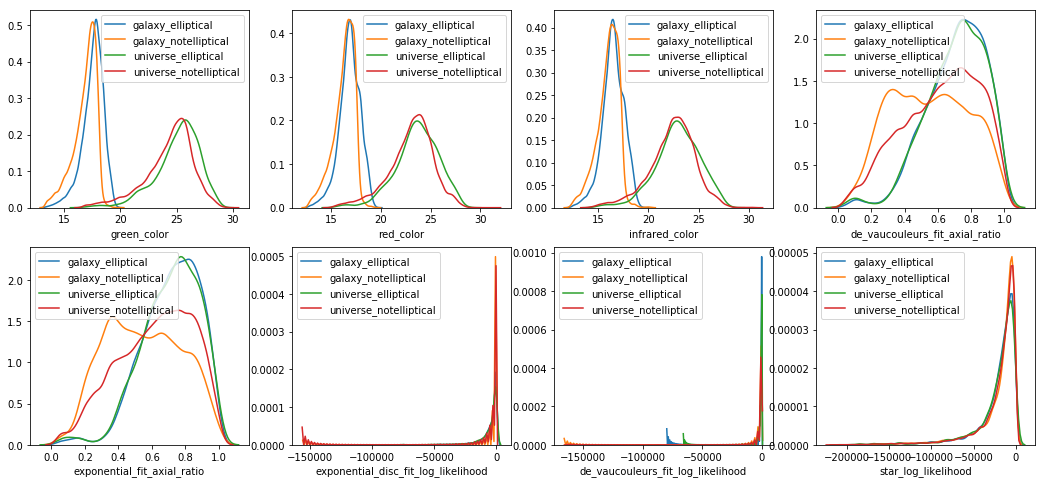

In [364]:
fig, axes = plt.subplots(figsize=(18,8), ncols=4, nrows=2)

for i, ax in zip(galaxy_columns, axes.flat):
    sns.distplot(ep_df_x[i], hist=False, ax=ax,label='galaxy_elliptical')
    sns.distplot(notep_df_x[i], hist=False, ax=ax,label='galaxy_notelliptical')
    sns.distplot(ep_univ_x[i], hist=False, ax=ax,label='universe_elliptical')
    sns.distplot(notep_univ_x[i], hist=False, ax=ax,label='universe_notelliptical')
plt.show()

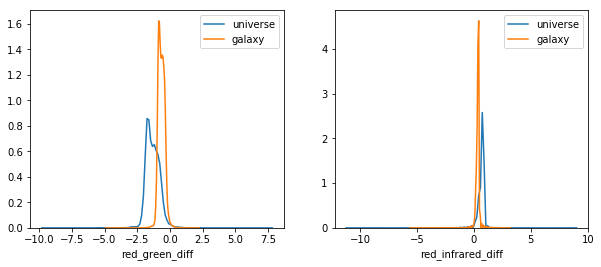

In [296]:
fig, axes= plt.subplots(figsize=(10,4), ncols=2, nrows=1)
sns.distplot(universe_df['red_green_diff'], hist=False, ax=axes[0], label='universe')
sns.distplot(galaxy_df['red_green_diff'], hist=False, ax=axes[0], label='galaxy')
sns.distplot(universe_df['red_infrared_diff'], hist=False, ax=axes[1], label='universe')
sns.distplot(galaxy_df['red_infrared_diff'], hist=False, ax=axes[1], label='galaxy')
plt.show()

**From results of 3.1, we know that the model we built before has a bad performance on the new dataset. In order to detect the reason, we first calculated the proportion of elliptical galaxies in the labeled part of the dataset. But our model is built on an imbalanced dataset with 37% elliptical galaxies. Thus the difference in class weight might be one of the causes that the model performs differently on the two datasets.     **   

**We also plot the distributions of all the features and find that the three color features display different distributions in the galaxy_df and  universe_df. This may also be one of the reasons why the performances of the model differ on the two datasets. **

In [297]:
# Transform color features in universe_df in order to convert them into the same distribution as galaxy_df

color_cols = ['green_color','red_color','infrared_color']
for i in color_cols:
    mu1 = galaxy_df[i].mean()
    mu2 = universe_df[i].mean()
    sigma1 = galaxy_df[i].std()
    sigma2 = universe_df[i].std()
    universe_df[i] = (universe_df[i]-mu2)/sigma2*sigma1+mu1

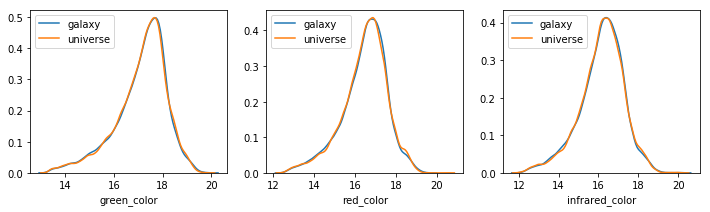

In [298]:
fig, axes = plt.subplots(figsize=(12,3), ncols=3, nrows=1)

for i, ax in zip(color_cols, axes.flat):
    sns.distplot(galaxy_df[i], hist=False, ax=ax,label='galaxy')
    sns.distplot(universe_df[i], hist=False, ax=ax,label='universe')
plt.show()

**As shown above, after transforming the color features of universe_df, those features have the same distribution in two datasets. **

In [299]:
X_univ_norm = universe_df.drop(univ_dropcols, axis=1).values
X_univ_norm_scaled = std_scaler.transform(X_univ_norm)
y_univ_pred_new = lr_model.predict_classes(X_univ_norm_scaled)
ep_prop_new = sum(y_univ_pred_new)/len(y_univ_pred_new)
print("The proportion of elliptical galaxies is", ep_prop_new[0])

The proportion of elliptical galaxies is 0.4285930670359631


**We first transform the color features of the new dataset, and then use the fitted scaler to standardize all the features of this dataset. At this time, the estimated proportion of elliptical galaxies decreases from 99% to 43%, which sounds more reasonable. **

3.3

**In order to produce an accurate estimate of the proportion of elliptical galaxies, we can improve the model by using more training data or adding other important features, such as shape and texture parameters mentioned in the atricle by Manda Banerji et al. If possible, we also want to train the model using balanced data.                  
When making prediction on a new dataset, we want to make sure that all the features have same distribution in both the training data set and the new data set. **